In [1]:
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

path_to_dfs = Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/test/occurence_voting/departement-01-ain/full_0_all_departement_0_None_node/catboost_search_one_nbsinister-kmeans-5-Class-Dept_classification_softmax')

/home/caron/Bureau/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1
Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1
Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1


In [3]:
res = read_object(f'catboost_search_one_nbsinister-kmeans-5-Class-Dept_classification_softmax_full_0_all_departement_0_None_node_z-score_Catboost_departement-01-ain_pred.pkl', path_to_dfs)

In [73]:
"""firepoint = pd.read_csv('/home/caron/Bureau/csv/france/firepoint/firepoint.csv')
firepoint_2 = pd.read_csv('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/sinister/bdiff/firepoint.csv')
firepoint_2 = firepoint_2[firepoint_2['Département'] == 13]
firepoint_2 = firepoint_2[(firepoint_2['date'] >= '2023-03-01') & (firepoint_2['date'] <= '2023-09-30')]
firepoint_2"""

firepoint = pd.read_csv('/home/caron/Bureau/csv/france/firepoint/firepoint.csv')
firepoint_2 = pd.read_csv('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/sinister/firemen/firepoint.csv')
firepoint_2 = firepoint_2[firepoint_2['departement'] == 'departement-01-ain']
#firepoint_2 = firepoint_2[(firepoint_2['date'] >= '2023-03-01')]
firepoint_2

,id_intervention,raison_sortie,date_debut,date_fin,FL_CCR_CCF,nb_eng_CC,label,year,geometry,latitude,...,departement,scale0,1er engin SLL,Famille SDIS sinistre,Code sinistre,idk,centroid,altitude,N∞ inter,Type engin
0,18BB000936,NATURELS,2018-01-05 17:41:19,2018-01-05 18:45:21,1.0,1.0,1.0,2018.0,POINT (5.40067950288725 46.11392703711171),46.113927,...,departement-01-ain,781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18BB001093,NATURELS,2018-01-06 17:56:49,2018-01-06 19:37:07,1.0,1.0,1.0,2018.0,POINT (5.341383006066522 46.14565445996581),46.145654,...,departement-01-ain,654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18BB001862,NATURELS,2018-01-12 08:43:15,2018-01-12 09:36:25,1.0,1.0,1.0,2018.0,POINT (5.691933471524859 45.8654043668394),45.865404,...,departement-01-ain,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18BB002367,NATURELS,2018-01-15 17:55:58,2018-01-15 18:59:14,1.0,1.0,1.0,2018.0,POINT (5.054655960570852 45.8729756400462),45.872976,...,departement-01-ain,935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18BB003056,NATURELS,2018-01-19 22:57:16,2018-01-20 00:21:51,1.0,1.0,1.0,2018.0,POINT (5.795944151313267 45.948246966190304),45.948247,...,departement-01-ain,590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,24BB030625,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2024.0,"POLYGON ((5.146532505428956 45.85275200512586,...",45.863957,...,departement-01-ain,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3086,24BB030788,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2024.0,"POLYGON ((5.146532505428956 45.85275200512586,...",45.863957,...,departement-01-ain,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3087,24BB031003,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2024.0,"POLYGON ((5.146532505428956 45.85275200512586,...",45.863957,...,departement-01-ain,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3088,24BB031228,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2024.0,"POLYGON ((5.103861240925337 46.26799629728592,...",46.271106,...,departement-01-ain,1022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
firepoint_2[firepoint_2['date'] == '2023-03-11']

,id_intervention,raison_sortie,date_debut,date_fin,FL_CCR_CCF,nb_eng_CC,label,year,geometry,latitude,...,departement,scale0,1er engin SLL,Famille SDIS sinistre,Code sinistre,idk,centroid,altitude,N∞ inter,Type engin
2689,23BB012096,NATURELS,2023-03-11 13:21:19,2023-03-11 15:58:12,1.0,1.0,1.0,2023.0,POINT (5.541020454636411 45.72774588449472),45.727746,...,departement-01-ain,664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
allDates.index('2023-10-08')

2309

In [76]:
date_fire = firepoint_2.date.unique()
len(date_fire)

1214

In [77]:
date_fire

array(['2018-01-05', '2018-01-06', '2018-01-12', ..., '2024-06-25',
       '2024-06-26', '2024-06-27'], dtype=object)

In [78]:
dates = df_test.date.values
print(allDates[int(dates[0])], allDates[int(dates[-1])])
dates_fire_1 = df_test[(df_test['nbsinister'] > 0) & (df_test['departement'] == 1)]
#dates = dates_fire_1.date.values.astype(int)
len(dates_fire_1)

2018-02-28 2024-06-27


1023

In [79]:
date_missing = [allDates.index(d) for d in date_fire if allDates.index(d) not in dates_fire_1.date.values.astype(int)]
date_missing, len(date_missing)

([207,
  208,
  214,
  217,
  221,
  227,
  230,
  231,
  236,
  242,
  246,
  250,
  253,
  257,
  258,
  259,
  260,
  287,
  416,
  446,
  500,
  508,
  509,
  511,
  514,
  516,
  517,
  518,
  524,
  525,
  533,
  536,
  540,
  543,
  548,
  550,
  553,
  554,
  562,
  563,
  564,
  565,
  566,
  570,
  571,
  572,
  575,
  576,
  579,
  599,
  613,
  614,
  615,
  616,
  617,
  618,
  619,
  620,
  621,
  622,
  623,
  624,
  625,
  688,
  689,
  711,
  775,
  792,
  878,
  890,
  894,
  895,
  897,
  903,
  907,
  910,
  918,
  920,
  929,
  936,
  937,
  941,
  943,
  948,
  950,
  951,
  957,
  959,
  964,
  969,
  970,
  971,
  972,
  974,
  975,
  976,
  977,
  978,
  979,
  981,
  982,
  983,
  984,
  985,
  986,
  987,
  988,
  989,
  991,
  1000,
  1013,
  1096,
  1177,
  1239,
  1243,
  1245,
  1248,
  1250,
  1251,
  1252,
  1255,
  1257,
  1258,
  1260,
  1261,
  1262,
  1264,
  1267,
  1268,
  1269,
  1270,
  1272,
  1273,
  1278,
  1283,
  1289,
  1295,
  1317,
  134

In [81]:
firepoint_2[firepoint_2['date'].isin([allDates[d] for d in date_missing])]

,id_intervention,raison_sortie,date_debut,date_fin,FL_CCR_CCF,nb_eng_CC,label,year,geometry,latitude,...,departement,scale0,1er engin SLL,Famille SDIS sinistre,Code sinistre,idk,centroid,altitude,N∞ inter,Type engin
0,18BB000936,NATURELS,2018-01-05 17:41:19,2018-01-05 18:45:21,1.0,1.0,1.0,2018.0,POINT (5.40067950288725 46.11392703711171),46.113927,...,departement-01-ain,781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18BB001093,NATURELS,2018-01-06 17:56:49,2018-01-06 19:37:07,1.0,1.0,1.0,2018.0,POINT (5.341383006066522 46.14565445996581),46.145654,...,departement-01-ain,654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18BB001862,NATURELS,2018-01-12 08:43:15,2018-01-12 09:36:25,1.0,1.0,1.0,2018.0,POINT (5.691933471524859 45.8654043668394),45.865404,...,departement-01-ain,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18BB002367,NATURELS,2018-01-15 17:55:58,2018-01-15 18:59:14,1.0,1.0,1.0,2018.0,POINT (5.054655960570852 45.8729756400462),45.872976,...,departement-01-ain,935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18BB003056,NATURELS,2018-01-19 22:57:16,2018-01-20 00:21:51,1.0,1.0,1.0,2018.0,POINT (5.795944151313267 45.948246966190304),45.948247,...,departement-01-ain,590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,23BB027038,NATURELS,2023-06-06 15:31:56,2023-06-06 17:13:48,1.0,1.0,1.0,2023.0,POINT (6.114478316989438 46.26032964534197),46.260330,...,departement-01-ain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2864,23BB038797,NATURELS,2023-08-02 15:23:50,2023-08-02 18:34:52,1.0,1.0,NaN,2023.0,POINT (5.095743968111543 46.409162754461676),46.409163,...,departement-01-ain,434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,23BB050861,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2023.0,"POLYGON ((5.272220706743107 45.88944134000002,...",45.891410,...,departement-01-ain,928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037,23BB067102,FEU D ESPACES NATURELS,NaN,NaN,NaN,NaN,NaN,2023.0,POLYGON ((5.919403009069773 46.197641783025745...,46.203234,...,departement-01-ain,947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
[allDates[d] for d in date_missing]

['2023-03-11',
 '2023-05-08',
 '2023-05-20',
 '2023-06-06',
 '2023-08-02',
 '2023-10-02',
 '2023-12-26',
 '2024-03-07']

In [48]:
date_missing = [allDates[d] for d in dates_fire_1.date.values.astype(int) if allDates[d] not in date_fire]
date_missing, len(date_missing)

([], 0)

In [57]:
print(res[res['date'] == 2212]['nbsinister-kmeans-5-Class-Dept'])
firepoint_2[firepoint_2['date'] == allDates[2098]]

Series([], Name: nbsinister-kmeans-5-Class-Dept, dtype: int64)


,id_intervention,raison_sortie,date_debut,date_fin,FL_CCR_CCF,nb_eng_CC,label,year,geometry,latitude,...,departement,scale0,1er engin SLL,Famille SDIS sinistre,Code sinistre,idk,centroid,altitude,N∞ inter,Type engin
2689,23BB012096,NATURELS,2023-03-11 13:21:19,2023-03-11 15:58:12,1.0,1.0,1.0,2023.0,POINT (5.541020454636411 45.72774588449472),45.727746,...,departement-01-ain,664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_test = read_object('df_test_full_departement_0_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/occurence_voting'))
df_test[(df_test['date'] == 2098) & (df_test['departement'] == 1)]['nbsinister']

51    0.0
Name: nbsinister, dtype: float64

In [82]:
df_test = read_object('df_full_departement_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/'))
df_test[(df_test['date'] == 207) & (df_test['departement'] == 1)]['nbsinister']

Series([], Name: nbsinister, dtype: float64)

In [ ]:
date_missing = [allDates[d] for d in dates_fire_1.date.values.astype(int) if allDates[d] not in date_fire]


In [60]:
df_test = read_object('Y_full_departement_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/'))
print(df_test[0])
#df_test[( == 2101) & (df_test['departement'] == 13)]['nbsinister']
df_test[(df_test[:, departement_index] == 1) & (df_test[:, date_index] == 2212)]

[  0.           0.           5.34990923  46.09856945   1.
 261.           0.           1.           0.           1.
   0.        ]


array([[0.00000000e+00, 0.00000000e+00, 5.34990923e+00, 4.60985694e+01,
        1.00000000e+00, 2.21200000e+03, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [59]:
allDates[2212]

'2023-07-03'

(45, 51, 2574)


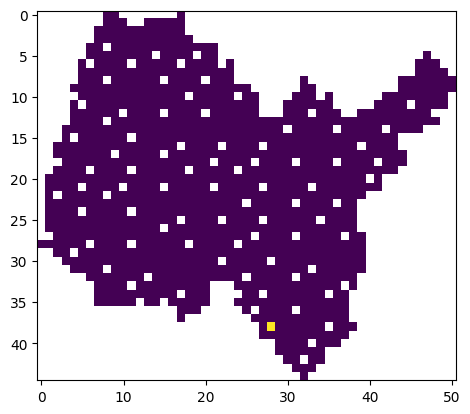

In [84]:
import matplotlib.pyplot as plt
df_test = read_object('departement-01-ainbinScale0.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/Target/firepoint/firemen/occurence/bin/2x2'))
print(df_test.shape)
plt.imshow(df_test[:, :, 2098])